## Importing libraries used

import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sea
import math
import re
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import QuantileTransformer

## Importing the data

In [111]:
gasoline = pd.read_csv('measurements.csv')
gasoline2 = pd.read_csv('measurements.csv')

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [13]:
gasoline.shape

(388, 12)

In [31]:
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


## Cleaning data

In [71]:
dif_type = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'refill liters']
gasoline[dif_type] = gasoline[dif_type].apply(pd.to_numeric, errors='coerce')
gasoline2[dif_type] = gasoline2[dif_type].apply(pd.to_numeric, errors='coerce')

In [35]:
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  8 non-null      float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [28]:
no_commas = ['distance', 'consume', 'temp_inside', 'temp_outside']

for col in no_commas:
     gasoline[col] = gasoline[col].replace(',', '.')

In [36]:
pd.isnull(gasoline).sum().sort_values(ascending = False).head(10)

refill liters    380
refill gas       375
specials         295
temp_inside       12
distance           0
consume            0
speed              0
temp_outside       0
gas_type           0
AC                 0
dtype: int64

In [38]:
null = (gasoline.isnull().sum()) / len(gasoline)
del_null = null[null.sort_values(ascending = False) >= 0.5].index
gasoline.drop(del_null,axis = 1,inplace = True)

## Which gasoline is the most used?

C:\Users\isaac\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


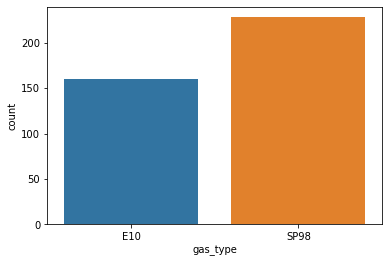

In [51]:
sea.countplot(gasoline['gas_type']);

## Looking for correlation

In [40]:
gas_check = gasoline.corr()
gas_check

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.075305,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.161991,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.059725,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120
temp_outside,0.088175,-0.320811,0.015411,0.361308,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.297775,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.037356,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.246120,0.346903,0.088598,-0.112650,1.000000


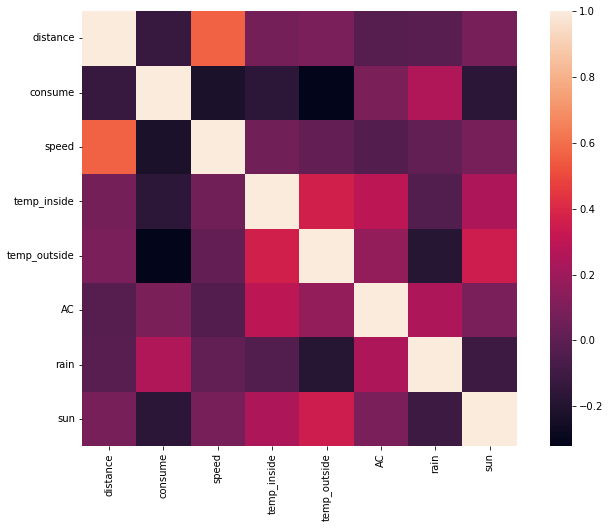

In [41]:
Mpl_size = mpl.subplots(figsize = (12, 8))
sea.heatmap(gas_check, square=True);

## Using models to get a better grasp on what is somewhat working

In [54]:
sp98 = gasoline[gasoline['gas_type']=='SP98']
sp98 = sp98.dropna()
e10 = gasoline[gasoline['gas_type']=='E10']
e10 = e10.dropna()

In [55]:
X = sm.add_constant(sp98[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun']])
Y = sp98['consume']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model = model.summary()
print(model)

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     8.500
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           3.67e-09
Time:                        13:23:43   Log-Likelihood:                -310.52
No. Observations:                 219   AIC:                             637.0
Df Residuals:                     211   BIC:                             664.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.3936      1.369      6.132   

In [56]:
X = sm.add_constant(e10[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun']])
Y = e10['consume']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model = model.summary()
print(model)

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     5.194
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.58e-05
Time:                        13:24:09   Log-Likelihood:                -188.24
No. Observations:                 157   AIC:                             392.5
Df Residuals:                     149   BIC:                             416.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0627      2.662      1.526   

## Final stage on testing

In [110]:
sp98_2 = gasoline2[gasoline['gas_type']=='SP98']
e10_2 = gasoline2[gasoline['gas_type']=='E10']

print(sp98_2.shape)
print(e10_2.shape)

(228, 12)
(160, 12)


In [105]:
print(sp98_2[sp98_2['rain'] == 0].sum())
print('--------------------------------------------------------')
print(sp98_2[sp98_2['rain'] == 1].sum())

distance                                                     643.0
consume                                                      119.0
speed                                                         7973
temp_inside                                                 2496.0
temp_outside                                                  2541
gas_type         SP98SP98SP98SP98SP98SP98SP98SP98SP98SP98SP98SP...
AC                                                              15
rain                                                             0
sun                                                             20
refill liters                                                121.0
dtype: object
--------------------------------------------------------
distance                                                      61.0
consume                                                       22.0
speed                                                         1334
temp_inside                                               

C:\Users\isaac\AppData\Local\Temp\ipykernel_18348\2619469101.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sp98_2[sp98_2['rain'] == 0].sum())
C:\Users\isaac\AppData\Local\Temp\ipykernel_18348\2619469101.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sp98_2[sp98_2['rain'] == 1].sum())


In [108]:
#On normal days
print(643/119)

#On rainy days
print(61/22)

5.4033613445378155
2.772727272727273


In [106]:
print(e10_2[e10_2['rain'] == 0].sum())
print('--------------------------------------------------------')
print(e10_2[e10_2['rain'] == 1].sum())

distance                                                     302.0
consume                                                       86.0
speed                                                         6266
temp_inside                                                  796.0
temp_outside                                                  1487
gas_type         E10E10E10E10E10E10E10E10E10E10E10E10E10E10E10E...
AC                                                               3
rain                                                             0
sun                                                             12
refill liters                                                 84.0
dtype: object
--------------------------------------------------------
distance                                                      13.0
consume                                                        9.0
speed                                                          695
temp_inside                                               

C:\Users\isaac\AppData\Local\Temp\ipykernel_18348\1988251549.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(e10_2[e10_2['rain'] == 0].sum())
C:\Users\isaac\AppData\Local\Temp\ipykernel_18348\1988251549.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(e10_2[e10_2['rain'] == 1].sum())


In [107]:
#On normal days
print(302/86)

#On rainy days
print(13/9)

3.511627906976744
1.4444444444444444


## Conclusions

At the end we can conclude that with only this data, the most popular of the gas types is definitely with a difference of 68 trips, SP98, but why is that?

It seems like overall efficiency per liter even on rainy days goes to SP98. Although we have a lot of data missing, like car types, urban or highways, and so on.

What somewhat could be surprising in this data, is that distance may not be as correlated to consume as we think, since AC may be a factor depending on the car, could be a defining factor, we dont have enough trips/data to confirm our suspicions.
Even so, it seems that with the SP98 Inside temperature may be more of a factor with this consume than with E10 we cant confirm it. 